# Initial Data Preprocessing using new Data

### Importing packages that'll be used

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

### Getting all of the csv files that contain telemetry

In [84]:
basedir = '../../../tlm-data/train/'
data_files = []
with os.scandir(basedir) as dir:
    for item in dir:
        if item.is_file() and item.name[-4:] == '.csv':
            data_files.append(item.name)
            
print(*data_files, sep='\n')
print(f'\nThere are {len(data_files)} csv files with data')

Battery1_telemetryOutputData_2020_02_05_15_48_33.csv
Battery2_telemetryOutputData_2020_02_05_15_48_33.csv
CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv
RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv
RSSI2_telemetryOutputData_2020_02_05_15_48_33.csv
TlmTx_telemetryOutputData_2020_02_05_15_48_33.csv

There are 6 csv files with data


### Function that reads the csv and returns the lists of the values and time stamps

In [85]:
def process_file(data_file):
    values, nanos = [], []
    path = f'{basedir}{data_file}'
    with open(path, 'r') as data_csv:
        lines = [ x[:-1] for x in  data_csv.readlines() ]
        for line in lines[1:]:
            parts = line.split(',')
            if len(parts) < 4:
                continue
            _, val, time, _ = line.split(',')
            values.append(float(val))
            nanos.append(float(time))
        print(f'Read {len(vals)} lines from {path}')
    return values, nanos

### Function that formats unix timestamp to string format and saves to csv for later use

In [86]:
def save_csv_with_timestamp(filename, data):
    path = f'{basedir}generated/{filename}'
    with open(path, 'w') as csv:
        lines = []
        vals, times = data
        for i in range(len(vals)):
            val, time = vals[i], times[i]
            dt = datetime.fromtimestamp(time)
            date_str = dt.strftime('%Y-%m-%dT%H:%M:%S.%f')
            line = f'{date_str},{val}\n'
            lines.append(line)
        csv.writelines(lines)
    print(f'Saved {len(lines)} lines to generated/{filename} with formated timestamp string\n')

### Function that reformats the files, saves them to new generated files, and stores returns a list of the data

In [100]:
def read_reformat_and_store():
    data = []
    for csv in data_files:
        vals, time = process_file(csv)
        stored = (vals, time)
        data.append( stored )
        save_csv_with_timestamp(csv, stored)
    return data

### Function that reads all the generated files and returns the list of pandas Series objects

In [101]:
def read_to_series():
    series = []
    path = f'{basedir}generated/'
    for csv in data_files:
        s = pd.Series.from_csv(f'{path}{csv}')
        series.append(s)
        print(csv)
        print(s.head())
        print()
    return series    

### Executing the file reformat and saving data to list

In [94]:
data = read_reformat_and_store()

Read 6893 lines from ../../../tlm-data/train/Battery1_telemetryOutputData_2020_02_05_15_48_33.csv
Saved 6893 lines to generated/Battery1_telemetryOutputData_2020_02_05_15_48_33.csv with formated timestamp string

Read 6893 lines from ../../../tlm-data/train/Battery2_telemetryOutputData_2020_02_05_15_48_33.csv
Saved 6894 lines to generated/Battery2_telemetryOutputData_2020_02_05_15_48_33.csv with formated timestamp string

Read 6893 lines from ../../../tlm-data/train/CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv
Saved 6893 lines to generated/CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv with formated timestamp string

Read 6893 lines from ../../../tlm-data/train/RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv
Saved 6894 lines to generated/RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv with formated timestamp string

Read 6893 lines from ../../../tlm-data/train/RSSI2_telemetryOutputData_2020_02_05_15_48_33.csv
Saved 6894 lines to generated/RSSI2_telemetryOutputData_2020_02

### Executing the file reading and saving Series objects to list

In [99]:
series = read_to_series()

Battery1_telemetryOutputData_2020_02_05_15_48_33.csv
2020-02-05 07:48:33.520994    12.5
2020-02-05 07:48:33.622164    11.2
2020-02-05 07:48:33.722767    11.3
2020-02-05 07:48:33.823252    11.7
2020-02-05 07:48:33.923965    11.1
dtype: float64

Battery2_telemetryOutputData_2020_02_05_15_48_33.csv
2020-02-05 07:48:33.540301    14.9
2020-02-05 07:48:33.641321    15.8
2020-02-05 07:48:33.742324    16.1
2020-02-05 07:48:33.843091    10.6
2020-02-05 07:48:33.943734    10.3
dtype: float64

CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv
2020-02-05 07:48:33.563606    10181.8
2020-02-05 07:48:33.665165    10402.4
2020-02-05 07:48:33.766077     9623.3
2020-02-05 07:48:33.867295     9602.8
2020-02-05 07:48:33.968509    10170.6
dtype: float64

RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv
2020-02-05 07:48:33.506520   -101.7
2020-02-05 07:48:33.607553   -109.9
2020-02-05 07:48:33.708445   -106.7
2020-02-05 07:48:33.809109   -100.7
2020-02-05 07:48:33.909766   -102.2
dtype: float64

RSSI2_tel

### Function that uses the given data to graph a scatter plot of 10 % of the data

In [36]:
def scatter_plot(data_tup):
    vals, time = data_tup
    plt.scatter(time[0::10], vals[0::10])

In [79]:
def section_scatter(data_tup, start, end):
    vals, time = data_tup
    plt.scatter(time[start:end], vals[start:end])

### Function that used the given data to graph the Kernel Density Estimate

In [80]:
def kde_graph(data_tup):
    vals, time = data_tup
    s = pd.Series(vals)
    s.plot(kind='kde')

### Plotting the graphs using the data from `Battery1_telemetryOutputData_2020_02_05_15_48_33.csv`

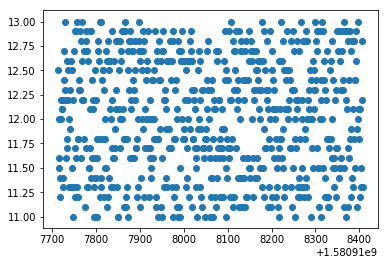

In [37]:
scatter_plot(data[0])

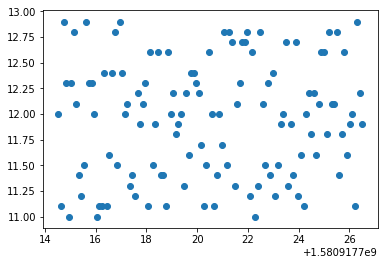

In [47]:
section_scatter(data[0], 10, 130)

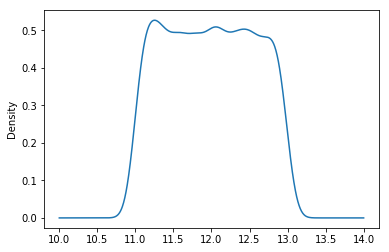

In [102]:
kde_graph(data[0])

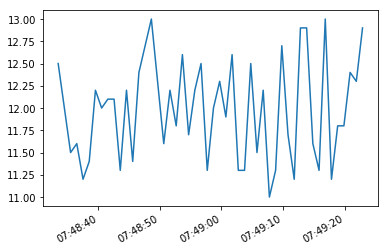

In [137]:
series[0][0:500:10].plot()

### Plotting the graphs using the data from `Battery2_telemetryOutputData_2020_02_05_15_48_33.csv`

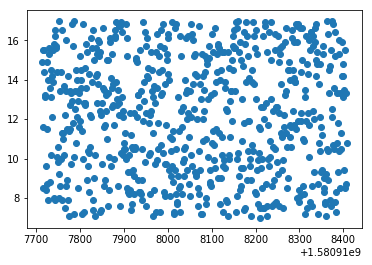

In [16]:
scatter_plot(data[1])

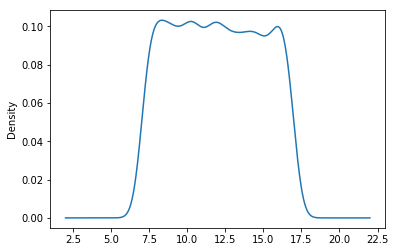

In [138]:
kde_graph(data[1])

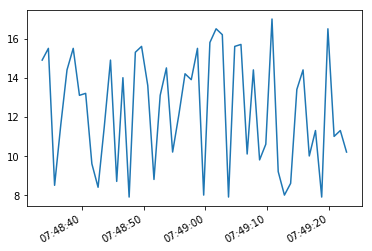

In [139]:
series[1][0:500:10].plot()

### Plotting the graphs using the data from `CmdRcv_telemetryOutputData_2020_02_05_15_48_33.csv`

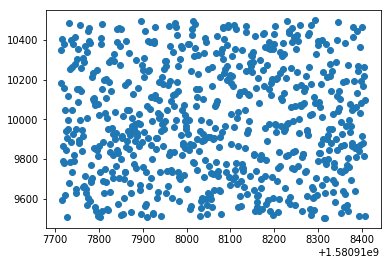

In [18]:
scatter_plot(data[2])

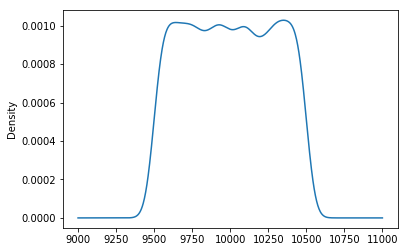

In [140]:
kde_graph(data[2])

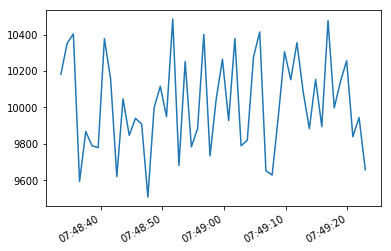

In [141]:
series[2][0:500:10].plot()

### Plotting the graphs using the data from `RSSI1_telemetryOutputData_2020_02_05_15_48_33.csv`

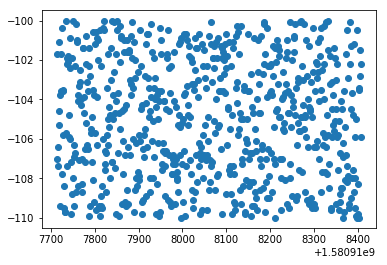

In [20]:
scatter_plot(data[3])

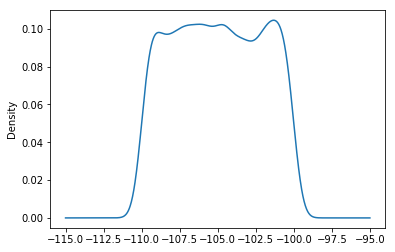

In [142]:
kde_graph(data[3])

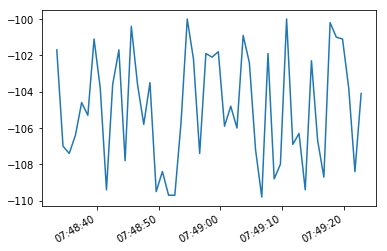

In [143]:
series[3][0:500:10].plot()

### Plotting the graphs using the data from `RSSI2_telemetryOutputData_2020_02_05_15_48_33.csv`

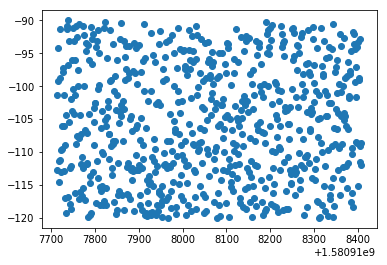

In [22]:
scatter_plot(data[4])

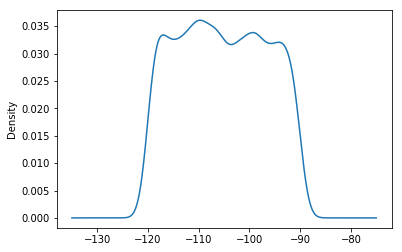

In [144]:
kde_graph(data[4])

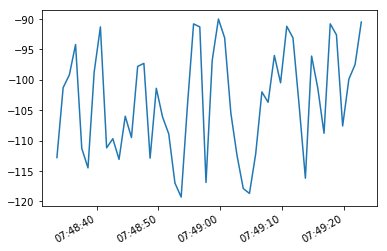

In [145]:
series[4][0:500:10].plot()

### Plotting the graphs using the data from `TlmTx_telemetryOutputData_2020_02_05_15_48_33.csv`

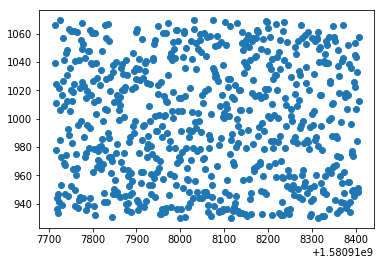

In [24]:
scatter_plot(data[5])

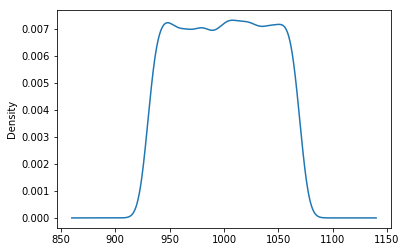

In [25]:
kde_graph(data[5])

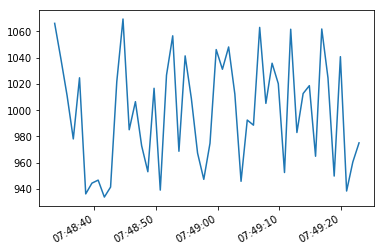

In [146]:
series[5][0:500:10].plot()